In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#Load Dataset
df = pd.read_excel('/content/digital_dice_dataset.xlsx')




In [ ]:
#Basic Exploration
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (100, 2)


,Roll_Number,Dice_Value
0,1,2
1,2,3
2,3,4
3,4,3
4,5,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Roll_Number  100 non-null    int64
 1   Dice_Value   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
#Check Missing Values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Roll_Number    0
Dice_Value     0
dtype: int64


In [ ]:

df.dropna(inplace=True)


In [ ]:
#Statistical Summary
df.describe()

,Roll_Number,Dice_Value
count,100.000000,100.000000
mean,50.500000,3.680000
std,29.011492,1.496663
min,1.000000,1.000000
25%,25.750000,3.000000
50%,50.500000,4.000000
75%,75.250000,5.000000
max,100.000000,6.000000


In [ ]:
#Frequency of Dice Values
dice_count = df['Dice_Value'].value_counts().sort_index()
print("\nDice Value Frequency:")
print(dice_count)


Dice Value Frequency:
Dice_Value
1     8
2    15
3    24
4    22
5    16
6    15
Name: count, dtype: int64


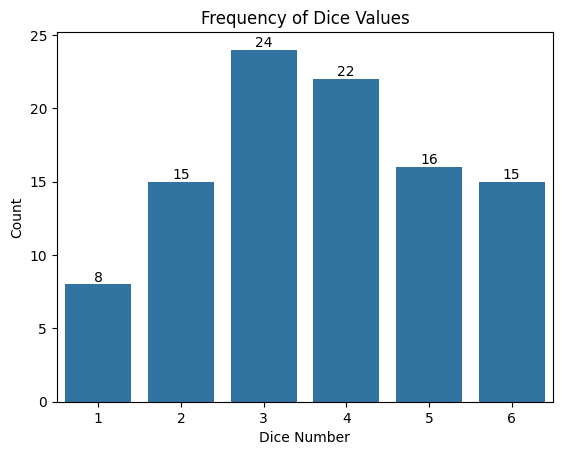

In [ ]:
#Count Plot
ax = sns.countplot(x='Dice_Value', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Frequency of Dice Values")
plt.xlabel("Dice Number")
plt.ylabel("Count")
plt.show()

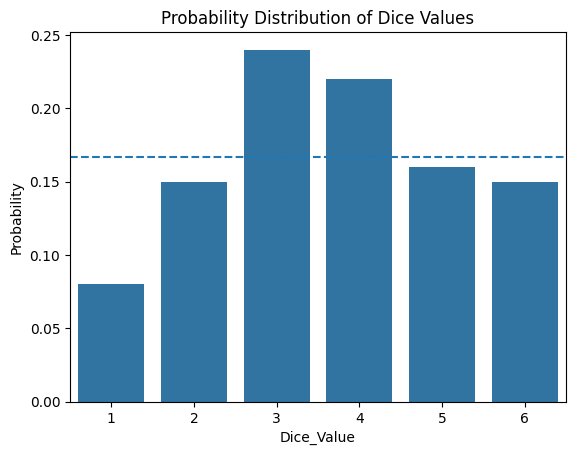

In [ ]:
#Probability Distribution
dice_prob = df['Dice_Value'].value_counts(normalize=True).sort_index().reset_index()
dice_prob.columns = ['Dice_Value', 'Probability']

sns.barplot(x='Dice_Value', y='Probability', data=dice_prob)
plt.axhline(y=1/6, linestyle='--')
plt.title("Probability Distribution of Dice Values")
plt.show()

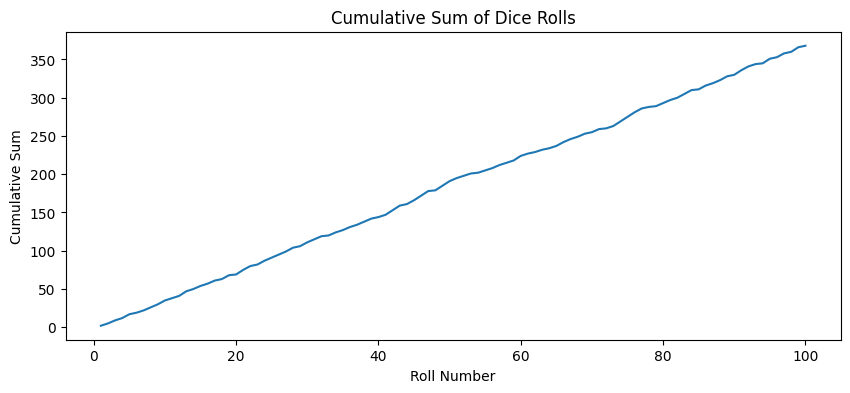

In [ ]:
#Cumulative Sum Analysis
df['Cumulative_Sum'] = df['Dice_Value'].cumsum()

plt.figure(figsize=(10,4))
plt.plot(df['Roll_Number'], df['Cumulative_Sum'])
plt.title("Cumulative Sum of Dice Rolls")
plt.xlabel("Roll Number")
plt.ylabel("Cumulative Sum")
plt.show()

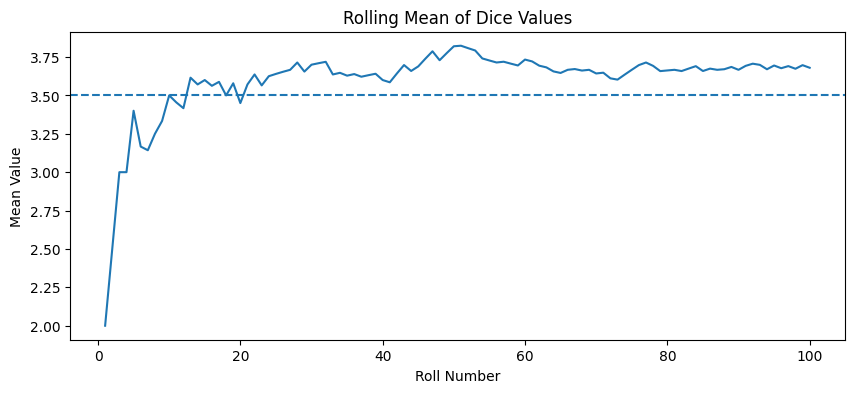

In [ ]:
#Rolling Mean Analysis
df['Rolling_Mean'] = df['Dice_Value'].expanding().mean()

plt.figure(figsize=(10,4))
plt.plot(df['Roll_Number'], df['Rolling_Mean'])
plt.axhline(y=3.5, linestyle='--')
plt.title("Rolling Mean of Dice Values")
plt.xlabel("Roll Number")
plt.ylabel("Mean Value")
plt.show()

In [ ]:
#Final Insight
print("Final Mean of Dice Values:", df['Dice_Value'].mean())


Final Mean of Dice Values: 3.68
